# 수입식품 category encoder with class balance

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
# Imports
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율(%)' : (df.isnull().sum()/len(df)).round(2),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

# 1. 데이터 확보

In [74]:
df = pd.read_pickle('../../pkl/df_filtered-01.pkl')
df.shape
df.head()

(366385, 14)

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log
1,서류가공품,판매용,캐나다,1.238,아니오,아니오,아니오,해당없음,N,N,N,0,9.875088,10.088854
2,청주,판매용,일본,3.636,아니오,아니오,아니오,해당없음,N,N,N,0,10.162770,11.453674
3,소스류,판매용,중국,2.004,아니오,아니오,아니오,표시하지않음,N,N,N,0,7.321189,8.016318
4,과실주,판매용,프랑스,5.733,아니오,아니오,아니오,해당없음,N,N,N,0,5.192957,6.939254
5,만두류,판매용,중국,4.540,아니오,아니오,아니오,해당없음,N,N,N,0,7.677864,9.190852


## 02_수입식품_anomaly detection_risk_based에서 신속통관을 위하여 정상이라고 판정한 수입건수는 제외

In [75]:
'''
Anomaly detection으로 정의 완료/////

Int64Index([  2710,   3904,  13177,  17721,  18344,  21249,  23021,  34593,
             45070,  77439,  88406,  89365,  91917, 105462, 107255, 112097,
            119190, 119612, 122487, 126120, 126882, 129724, 139420, 155459,
            173473, 186678, 187945, 215312, 216121, 223208, 235505, 237761,
            244095, 255661, 256614, 258200, 262978, 293082, 323398, 346038,
            373439, 380586, 381579, 382647, 382730, 393123, 411229, 422108,
            442839, 446031, 464103, 477321, 492148, 503084, 506986, 514594,
            515816, 518550, 520797, 539299, 560107, 567075, 574165, 593034,
            593891, 602277, 618190, 620925, 622789, 624500, 631072, 632666,
            633152, 635892, 641941, 644531, 645016, 683837, 690297, 691590,
            702551],
           dtype='int64')

Int64Index([  8719,  28860, 105048, 105853, 155055, 179027, 221281, 223560,
            231880, 258383, 330880, 352499, 364656, 388579, 452640, 492298,
            513459, 518732],
           dtype='int64')
           
'''

"\nAnomaly detection으로 정의 완료/////\n\nInt64Index([  2710,   3904,  13177,  17721,  18344,  21249,  23021,  34593,\n             45070,  77439,  88406,  89365,  91917, 105462, 107255, 112097,\n            119190, 119612, 122487, 126120, 126882, 129724, 139420, 155459,\n            173473, 186678, 187945, 215312, 216121, 223208, 235505, 237761,\n            244095, 255661, 256614, 258200, 262978, 293082, 323398, 346038,\n            373439, 380586, 381579, 382647, 382730, 393123, 411229, 422108,\n            442839, 446031, 464103, 477321, 492148, 503084, 506986, 514594,\n            515816, 518550, 520797, 539299, 560107, 567075, 574165, 593034,\n            593891, 602277, 618190, 620925, 622789, 624500, 631072, 632666,\n            633152, 635892, 641941, 644531, 645016, 683837, 690297, 691590,\n            702551],\n           dtype='int64')\n\nInt64Index([  8719,  28860, 105048, 105853, 155055, 179027, 221281, 223560,\n            231880, 258383, 330880, 352499, 364656, 388579, 45264

In [76]:
outliers_a = [2710,   3904,  13177,  17721,  18344,  21249,  23021,  34593,
             45070,  77439,  88406,  89365,  91917, 105462, 107255, 112097,
            119190, 119612, 122487, 126120, 126882, 129724, 139420, 155459,
            173473, 186678, 187945, 215312, 216121, 223208, 235505, 237761,
            244095, 255661, 256614, 258200, 262978, 293082, 323398, 346038,
            373439, 380586, 381579, 382647, 382730, 393123, 411229, 422108,
            442839, 446031, 464103, 477321, 492148, 503084, 506986, 514594,
            515816, 518550, 520797, 539299, 560107, 567075, 574165, 593034,
            593891, 602277, 618190, 620925, 622789, 624500, 631072, 632666,
            633152, 635892, 641941, 644531, 645016, 683837, 690297, 691590,
            702551]
outliers_b = [8719,  28860, 105048, 105853, 155055, 179027, 221281, 223560,
            231880, 258383, 330880, 352499, 364656, 388579, 452640, 492298,
            513459, 518732]

outliers = outliers_a + outliers_b

In [77]:
df.shape
len(df[df.index.isin(outliers)])
len(df[~df.index.isin(outliers)])

df = df[~df.index.isin(outliers)]
df.shape

(366385, 14)

99

366286

(366286, 14)

In [78]:
X = df.drop('판정결과', axis=1)
y = df['판정결과']

In [79]:
df['품목명'].astype(str) + '_' + df['제조국(원산지)'].astype(str)

1             서류가공품_캐나다
2                 청주_일본
3                소스류_중국
4               과실주_프랑스
5                만두류_중국
              ...      
714384         과실주_뉴질랜드
714387        초콜릿가공품_일본
714390          과실주_프랑스
714395      기타 농산가공품_미국
714404    기타 수산물가공품_베트남
Length: 366286, dtype: object

## 자료 전처리
- https://contrib.scikit-learn.org/category_encoders/index.html

In [80]:
data = df.sample(frac=0.2).copy()

In [81]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

numeric_features = data.drop(['판정결과'], axis=1).select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.drop(['판정결과'], axis=1).select_dtypes(include=['object', 'category']).columns

X = data.drop('판정결과', axis=1)
y = data['판정결과']

le = preprocessing.LabelEncoder()
label_encoder = le.fit(y)
y = label_encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
X_train.head(2)
X_train.shape

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,순중량(Kg)_log,과세가격_log
102532,빵류(그외 빵류),판매용,이탈리아,6.663,아니오,아니오,아니오,해당없음,N,N,N,5.699774,7.596392
298711,탄산음료,판매용,일본,4.481,아니오,아니오,아니오,해당없음,N,N,N,6.995766,8.495561


(58605, 13)

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [84]:
import category_encoders as ce

## Tagetmean과 WOE encoders

In [85]:
encoder_list = [ce.target_encoder.TargetEncoder,
                ce.woe.WOEEncoder
               ]

In [86]:
numeric_features
categorical_features

Index(['과세가격($/Kg)', '순중량(Kg)_log', '과세가격_log'], dtype='object')

Index(['품목명', '용도명', '제조국(원산지)', '유기식품 여부', '영유아섭취대상', '주문자상표부착', '유전자변형식품',
       '가온보존대상', '진균수시험대상', '방사선조사식품'],
      dtype='object')

In [87]:
from sklearn.metrics import f1_score, plot_confusion_matrix, classification_report

In [88]:
for encoder in encoder_list:
    print(encoder)
    numeric_transformer = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())])
    categorical_transformer = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('catencoder', encoder())])
    
    print(encoder())
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=500))])
    
    model = pipe.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(encoder)
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))

<class 'category_encoders.target_encoder.TargetEncoder'>
TargetEncoder()
<class 'category_encoders.target_encoder.TargetEncoder'>
0.5245194335916127
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.23      0.03      0.05       160

    accuracy                           0.99     14652
   macro avg       0.61      0.52      0.52     14652
weighted avg       0.98      0.99      0.98     14652

<class 'category_encoders.woe.WOEEncoder'>
WOEEncoder()
<class 'category_encoders.woe.WOEEncoder'>
0.5194107463974873
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.21      0.03      0.04       160

    accuracy                           0.99     14652
   macro avg       0.60      0.51      0.52     14652
weighted avg       0.98      0.99      0.98     14652



In [89]:
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier) 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier)
import lightgbm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [90]:
classifiers = {}
classifiers.update({'KNN': KNeighborsClassifier()})
classifiers.update({'GNB': GaussianNB()})
classifiers.update({'LGR': LogisticRegression()})
classifiers.update({'SVC': SVC(max_iter= 1000, probability=True)})
classifiers.update({'Decisiontree': DecisionTreeClassifier()})
classifiers.update({'Extratree': ExtraTreesClassifier(n_estimators=250)})
classifiers.update({'Bagging': BaggingClassifier(n_estimators=100)})
classifiers.update({'Random Forest': RandomForestClassifier(n_estimators=100)})
classifiers.update({'AdaBoost': AdaBoostClassifier(n_estimators=100)})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=2)})

In [91]:
# Parameters
parameters = {}
parameters.update({'Random Forest': {}})
parameters.update({'Gradient Boosting': {}})

In [92]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, average_precision_score
from sklearn.metrics import log_loss, brier_score_loss, matthews_corrcoef
from sklearn.model_selection import KFold, RandomizedSearchCV
import scikitplot as skplt 
from tqdm import tqdm_notebook

In [93]:
encoder()

WOEEncoder()

  0%|          | 0/10 [00:00<?, ?it/s]

KNeighborsClassifier()
<class 'category_encoders.woe.WOEEncoder'>
0.5143577541816116
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.21      0.02      0.03       160

    accuracy                           0.99     14652
   macro avg       0.60      0.51      0.51     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

GaussianNB()
<class 'category_encoders.woe.WOEEncoder'>
0.5040243858062016
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     14492
           1       0.02      0.09      0.04       160

    accuracy                           0.95     14652
   macro avg       0.51      0.52      0.50     14652
weighted avg       0.98      0.95      0.96     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

LogisticRegression()
<class 'category_encoders.woe.WOEEncoder'>
0.4972550096074664
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.00      0.00      0.00       160

    accuracy                           0.99     14652
   macro avg       0.49      0.50      0.50     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

SVC(max_iter=1000, probability=True)
<class 'category_encoders.woe.WOEEncoder'>
0.4972550096074664
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.00      0.00      0.00       160

    accuracy                           0.99     14652
   macro avg       0.49      0.50      0.50     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

DecisionTreeClassifier()
<class 'category_encoders.woe.WOEEncoder'>
0.5329450099219535
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14492
           1       0.07      0.08      0.08       160

    accuracy                           0.98     14652
   macro avg       0.53      0.53      0.53     14652
weighted avg       0.98      0.98      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

ExtraTreesClassifier(n_estimators=250)
<class 'category_encoders.woe.WOEEncoder'>
0.5323894212130666
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.19      0.04      0.07       160

    accuracy                           0.99     14652
   macro avg       0.59      0.52      0.53     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

BaggingClassifier(n_estimators=100)
<class 'category_encoders.woe.WOEEncoder'>
0.5233810096252137
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.17      0.03      0.05       160

    accuracy                           0.99     14652
   macro avg       0.58      0.51      0.52     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

RandomForestClassifier()
<class 'category_encoders.woe.WOEEncoder'>
0.5245194335916127
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.23      0.03      0.05       160

    accuracy                           0.99     14652
   macro avg       0.61      0.52      0.52     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

AdaBoostClassifier(n_estimators=100)
<class 'category_encoders.woe.WOEEncoder'>
0.49723775863843805
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.00      0.00      0.00       160

    accuracy                           0.99     14652
   macro avg       0.49      0.50      0.50     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

GradientBoostingClassifier(max_depth=2)
<class 'category_encoders.woe.WOEEncoder'>
0.4972205064854849
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.00      0.00      0.00       160

    accuracy                           0.99     14652
   macro avg       0.49      0.50      0.50     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

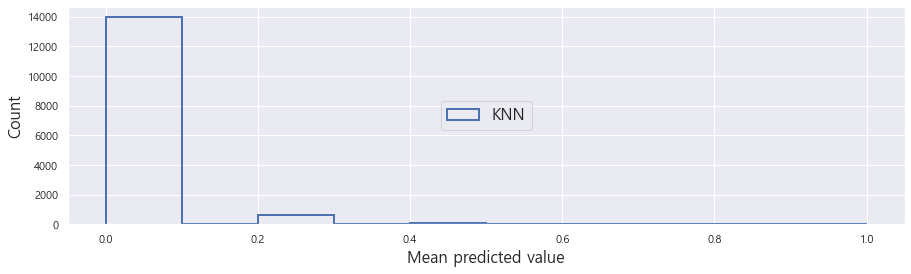

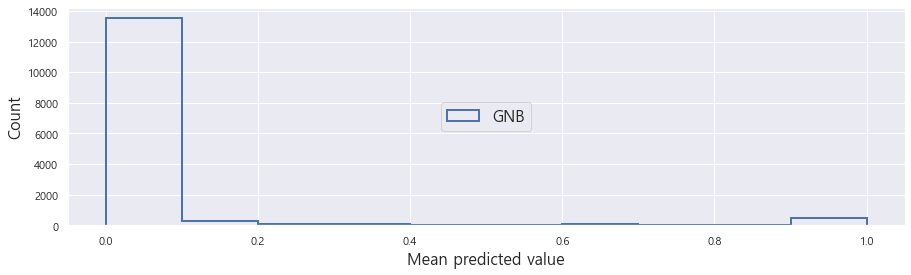

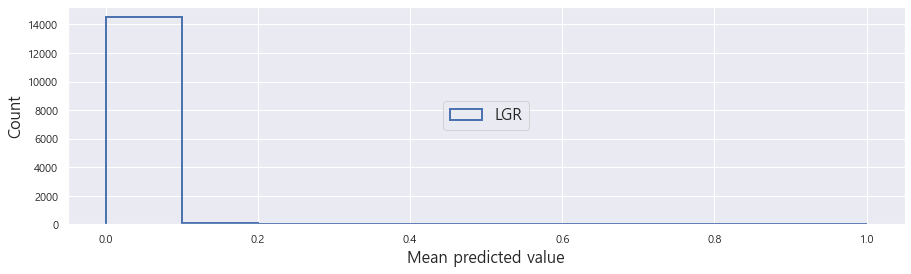

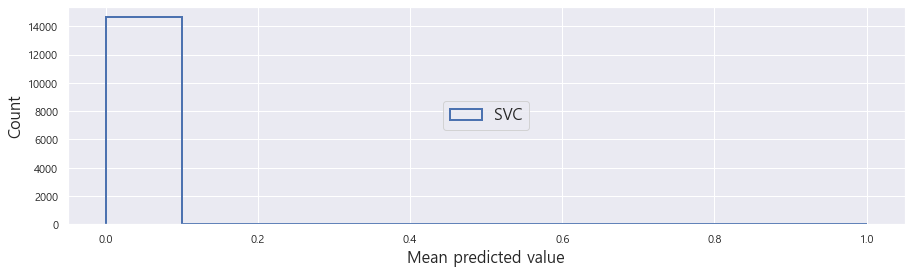

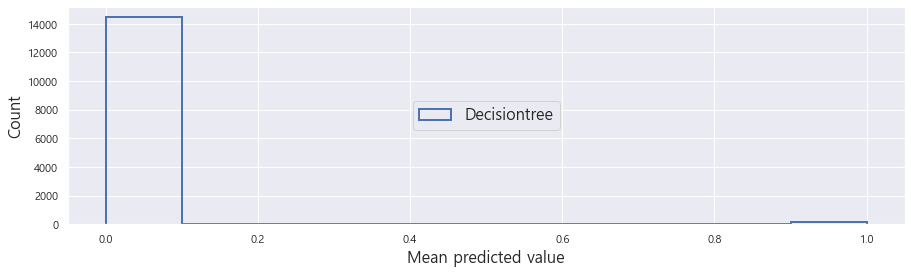

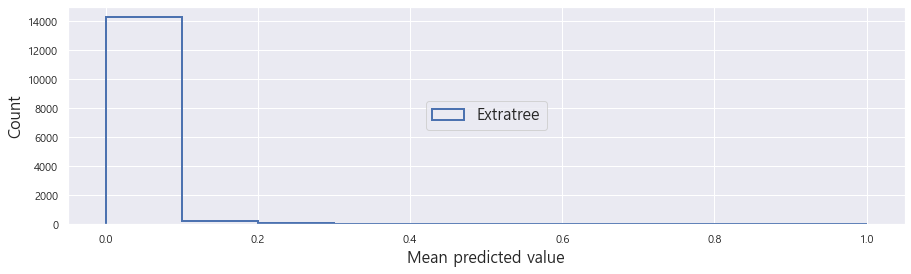

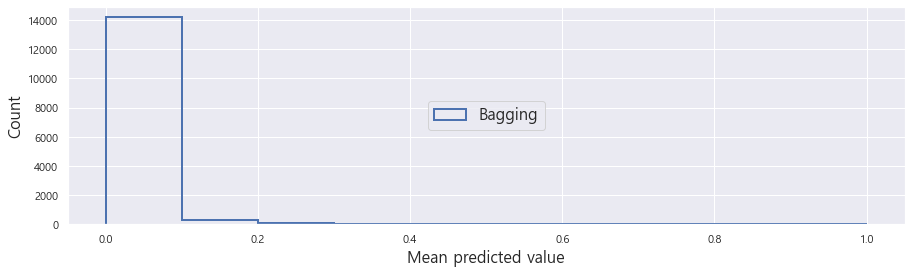

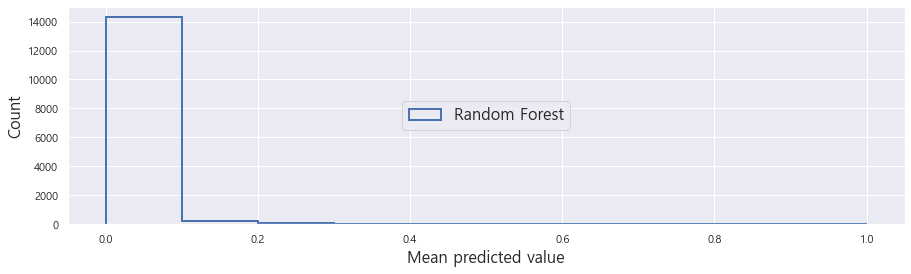

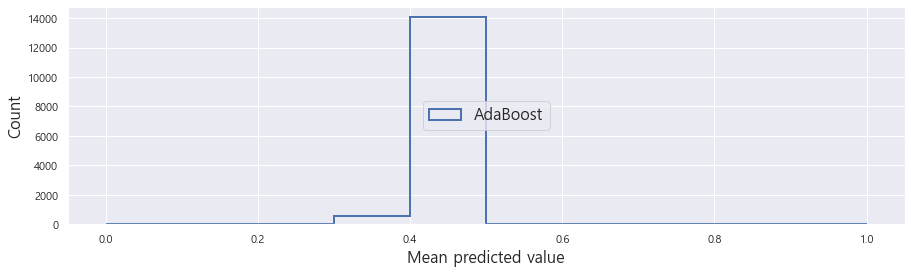

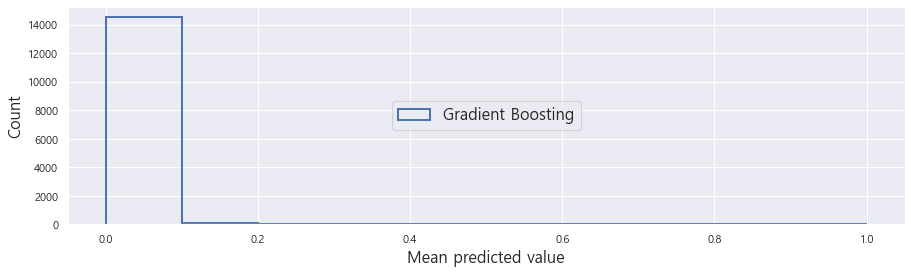

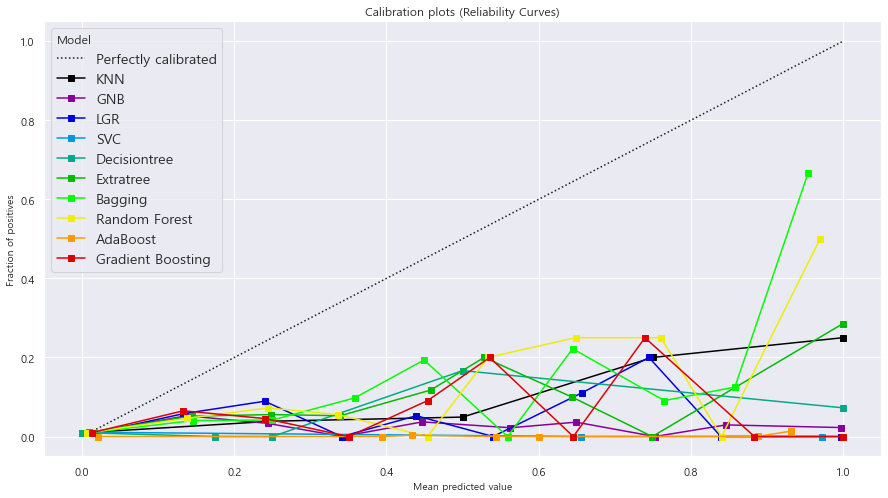

In [94]:
kf = KFold(n_splits=5)

classifier_labels = []
probas_list = []

for classifier_label, classifier in tqdm_notebook(classifiers.items()):


    #param_grid = parameters[classifier_label]
    param_grid = {}

    print(classifier)
    numeric_transformer = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())])
    categorical_transformer = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('catencoder', encoder())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)])
    
    grid = RandomizedSearchCV(pipe, param_grid, cv = kf,  
                              n_jobs= -1,
                              scoring = 'recall') 
    
    model = grid.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(encoder)
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))
    print('*'*100)
    
    
    # ccalibration curve
    y_proba = model.predict_proba(X_test)
    probas_list.append(y_proba)
    classifier_labels.append(classifier_label)
    
    # 예측확률분포
    plt.figure(figsize=(15,4))
    ax = plt.hist(y_proba[:,1], range=(0, 1), bins=10, label=classifier_label, histtype="step", lw=2)
    plt.xlabel("Mean predicted value", fontsize=16); plt.ylabel("Count",fontsize=16)
    plt.legend(fontsize=16, loc='center' )

skplt.metrics.plot_calibration_curve(y_test, probas_list, classifier_labels, figsize=(15,8))
leg = plt.legend(title='Model', fontsize = 14)
leg._legend_box.align = 'left'

## Loss function penalty

In [95]:
classifiers = {}
classifiers.update({'KNN': KNeighborsClassifier()})
classifiers.update({'GNB': GaussianNB()})
classifiers.update({'LGR': LogisticRegression(class_weight='balanced')})
classifiers.update({'SVC': SVC(class_weight='balanced', max_iter= 1000, probability=True)})
classifiers.update({'Decisiontree': DecisionTreeClassifier(class_weight='balanced')})
classifiers.update({'Extratree': ExtraTreesClassifier(class_weight='balanced', 
                                                      n_estimators=250)})
classifiers.update({'Bagging': BaggingClassifier(DecisionTreeClassifier(),
                                                 n_estimators=100)})
classifiers.update({'Random Forest': RandomForestClassifier(class_weight='balanced',
                                                            n_estimators=100)})
classifiers.update({'AdaBoost': AdaBoostClassifier(n_estimators=100)})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier(n_estimators=100,
                                                                 max_depth=2)})

  0%|          | 0/10 [00:00<?, ?it/s]

KNeighborsClassifier()
<class 'category_encoders.woe.WOEEncoder'>
0.5143577541816116
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.21      0.02      0.03       160

    accuracy                           0.99     14652
   macro avg       0.60      0.51      0.51     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

GaussianNB()
<class 'category_encoders.woe.WOEEncoder'>
0.5040243858062016
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     14492
           1       0.02      0.09      0.04       160

    accuracy                           0.95     14652
   macro avg       0.51      0.52      0.50     14652
weighted avg       0.98      0.95      0.96     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

LogisticRegression(class_weight='balanced')
<class 'category_encoders.woe.WOEEncoder'>
0.45240593945730884
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     14492
           1       0.03      0.72      0.06       160

    accuracy                           0.74     14652
   macro avg       0.51      0.73      0.45     14652
weighted avg       0.99      0.74      0.84     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

SVC(class_weight='balanced', max_iter=1000, probability=True)
<class 'category_encoders.woe.WOEEncoder'>
0.021430357333605217
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     14492
           1       0.01      1.00      0.02       160

    accuracy                           0.02     14652
   macro avg       0.51      0.51      0.02     14652
weighted avg       0.99      0.02      0.02     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

DecisionTreeClassifier(class_weight='balanced')
<class 'category_encoders.woe.WOEEncoder'>
0.5317296610012024
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14492
           1       0.07      0.07      0.07       160

    accuracy                           0.98     14652
   macro avg       0.53      0.53      0.53     14652
weighted avg       0.98      0.98      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

ExtraTreesClassifier(class_weight='balanced', n_estimators=250)
<class 'category_encoders.woe.WOEEncoder'>
0.5287685331103463
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.12      0.04      0.06       160

    accuracy                           0.99     14652
   macro avg       0.56      0.52      0.53     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
<class 'category_encoders.woe.WOEEncoder'>
0.5285219988213303
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.20      0.04      0.06       160

    accuracy                           0.99     14652
   macro avg       0.59      0.52      0.53     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

RandomForestClassifier(class_weight='balanced')
<class 'category_encoders.woe.WOEEncoder'>
0.5267702034084663
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.15      0.04      0.06       160

    accuracy                           0.99     14652
   macro avg       0.57      0.52      0.53     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

AdaBoostClassifier(n_estimators=100)
<class 'category_encoders.woe.WOEEncoder'>
0.49723775863843805
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.00      0.00      0.00       160

    accuracy                           0.99     14652
   macro avg       0.49      0.50      0.50     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

GradientBoostingClassifier(max_depth=2)
<class 'category_encoders.woe.WOEEncoder'>
0.4972205064854849
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14492
           1       0.00      0.00      0.00       160

    accuracy                           0.99     14652
   macro avg       0.49      0.50      0.50     14652
weighted avg       0.98      0.99      0.98     14652

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

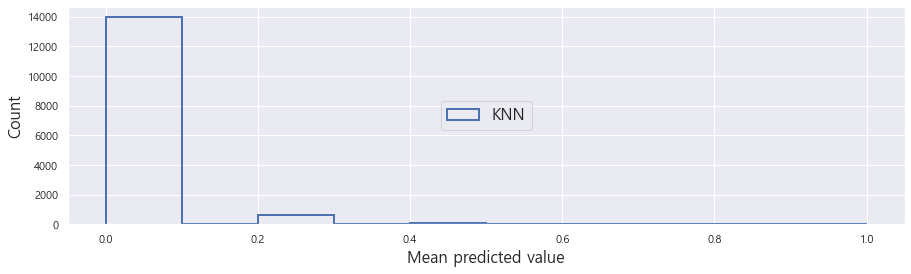

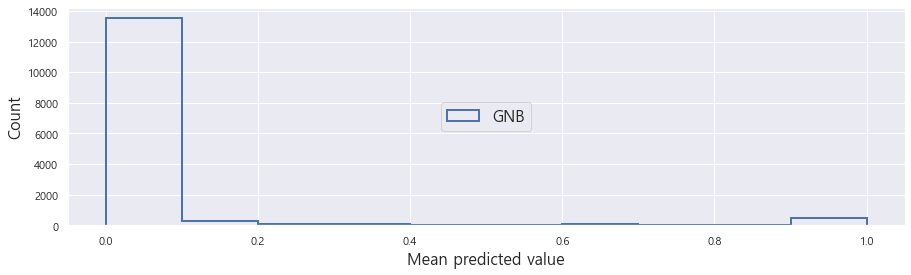

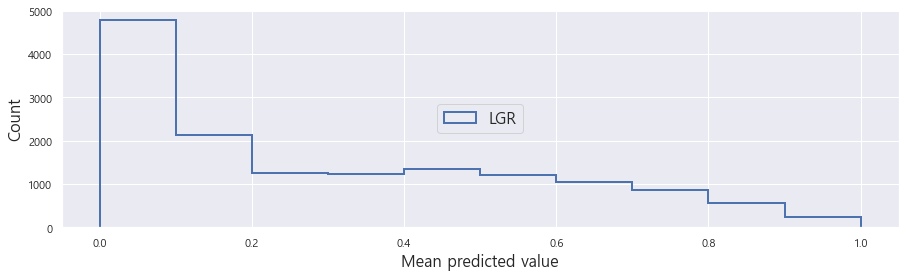

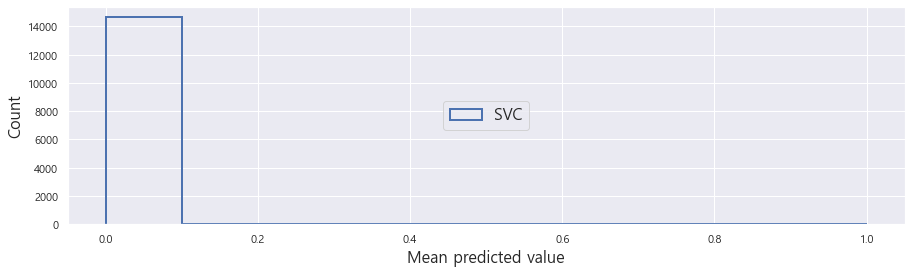

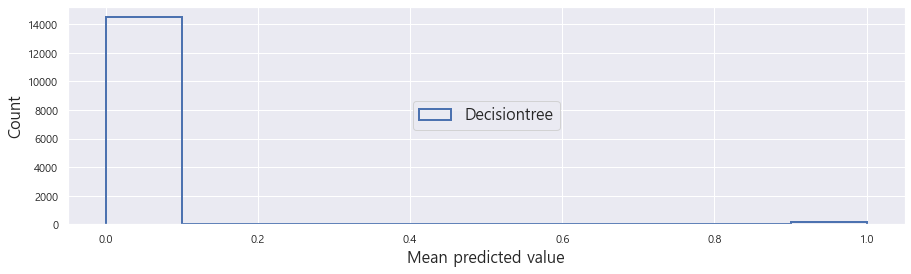

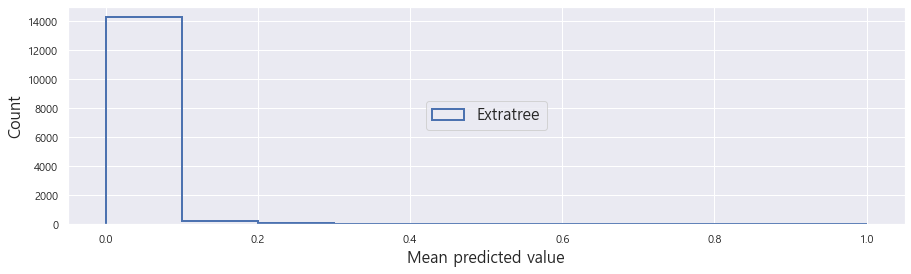

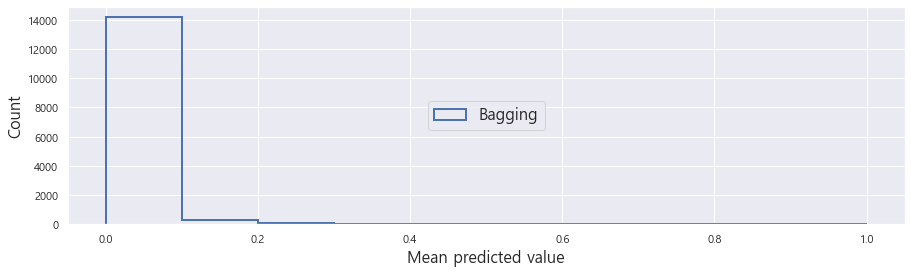

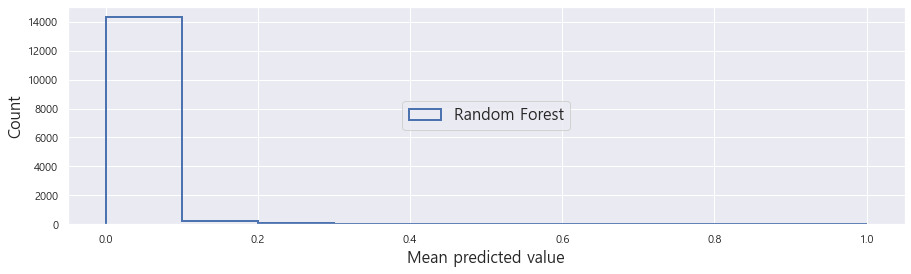

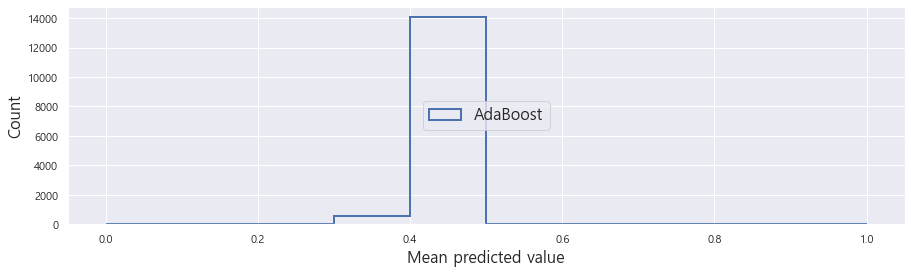

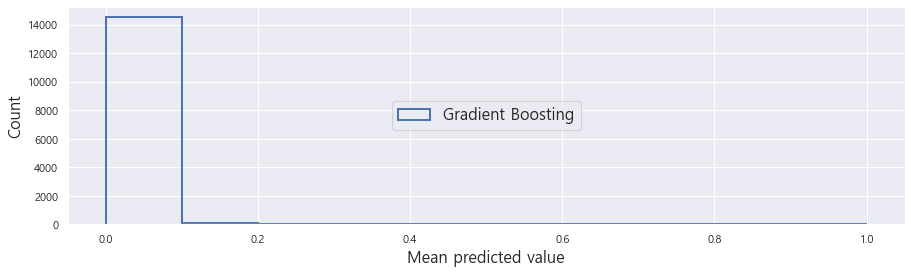

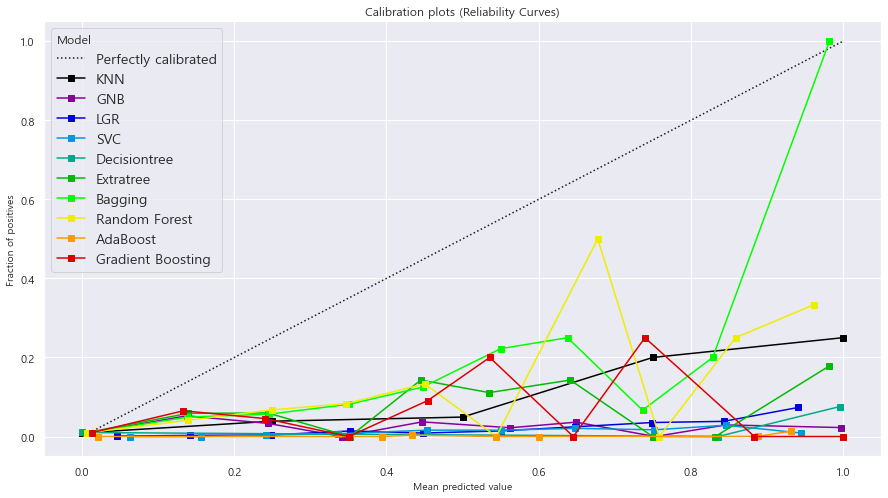

In [96]:
kf = KFold(n_splits=5)

classifier_labels = []
probas_list = []

for classifier_label, classifier in tqdm_notebook(classifiers.items()):

    #param_grid = parameters[classifier_label]
    param_grid = {}

    print(classifier)
    numeric_transformer = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())])
    categorical_transformer = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('catencoder', encoder())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)])
    
    grid = RandomizedSearchCV(pipe, param_grid, cv = kf,  
                              n_jobs= -1,
                              scoring = 'recall') 
    
    model = grid.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(encoder)
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))
    print('*'*100)
    
    # ccalibration curve
    y_proba = model.predict_proba(X_test)
    probas_list.append(y_proba)
    classifier_labels.append(classifier_label)
    
    # 예측확률분포
    plt.figure(figsize=(15,4))
    ax = plt.hist(y_proba[:,1], range=(0, 1), bins=10, label=classifier_label, histtype="step", lw=2)
    plt.xlabel("Mean predicted value", fontsize=16); plt.ylabel("Count",fontsize=16)
    plt.legend(fontsize=16, loc='center' )
    
skplt.metrics.plot_calibration_curve(y_test, probas_list, classifier_labels, figsize=(15,8))
leg = plt.legend(title='Model', fontsize = 14)
leg._legend_box.align = 'left'


## Random forest와 logistic regression이 recall과 precesion이 각각 제일 높음

In [42]:
df_filtered.to_pickle('../data/df_filtered.pkl')

# End